### linear regression in 1 variable
https://jax.readthedocs.io/en/latest/jax-101/01-jax-basics.html

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

In [16]:
## dummy data
size = 100
xs = np.stack([np.ones(size,), np.random.normal(size=(size,))]).T
noise = np.random.normal(scale=0.3, size=(size,))
# intercept, slope
theta = np.array([3, 10]).astype(np.float32)  #@param

ys = np.dot(xs, theta) + noise

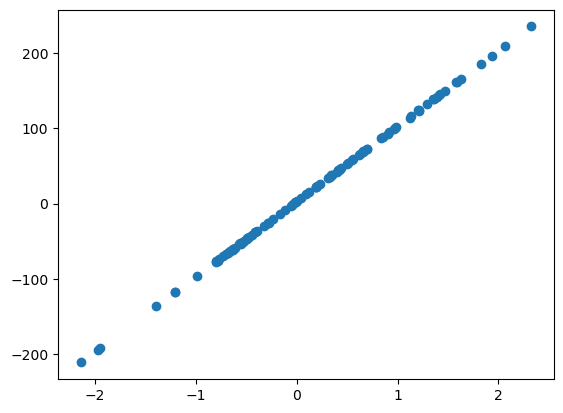

In [18]:
plt.scatter(xs[:, 1], ys)

In [19]:
params = {
    'theta': theta
}
data = {'x': xs, 'y': ys}

In [20]:
## model function
def model(params, x):
    y = jnp.dot(x, params['theta'])
    return y

In [21]:
## loss function
def sum_squared_error(params, x, y):
    preds = model(params, x)
    return jnp.mean((y - preds) ** 2), preds


def update(params, grads, lr=0.1):
    return {
        'theta': params['theta'] - lr * grads['theta']
    }

In [22]:
## training loop
# initial estimates
params = {
    'theta': jnp.array([0, 0], dtype=jnp.float32)
}

# hyperparmeters
max_steps = 100
eps = 1e-4

step = 0

# until we reach max_steps or the loss doesn't change by <eps>
while step < max_steps:
    # compute model value and grad
    (loss, preds), grads = jax.value_and_grad(sum_squared_error, has_aux=True)(params, xs, ys)


    print(loss, params)
    params_ = update(params, grads)
    print(params_)

    if jnp.mean(jnp.abs(params['theta'] - params_['theta'])) < eps:
        break
    params = params_
    step += 1
    # # check diff 
    # prev_loss, diff = loss, jnp.abs(prev_loss - loss)

8581.413 {'theta': Array([0., 0.], dtype=float32)}
{'theta': Array([ 4.41155 , 17.033295], dtype=float32)}
5779.061 {'theta': Array([ 4.41155 , 17.033295], dtype=float32)}
{'theta': Array([ 7.291197, 31.016014], dtype=float32)}
3930.0457 {'theta': Array([ 7.291197, 31.016014], dtype=float32)}
{'theta': Array([ 9.061658, 42.52279 ], dtype=float32)}
2697.573 {'theta': Array([ 9.061658, 42.52279 ], dtype=float32)}
{'theta': Array([10.039196, 52.014885], dtype=float32)}
1867.7446 {'theta': Array([10.039196, 52.014885], dtype=float32)}
{'theta': Array([10.4592285, 59.863472 ], dtype=float32)}
1303.5302 {'theta': Array([10.4592285, 59.863472 ], dtype=float32)}
{'theta': Array([10.495935, 66.36792 ], dtype=float32)}
916.3267 {'theta': Array([10.495935, 66.36792 ], dtype=float32)}
{'theta': Array([10.277243, 71.7703  ], dtype=float32)}
648.28235 {'theta': Array([10.277243, 71.7703  ], dtype=float32)}
{'theta': Array([ 9.896259, 76.266846], dtype=float32)}
461.24072 {'theta': Array([ 9.896259, 

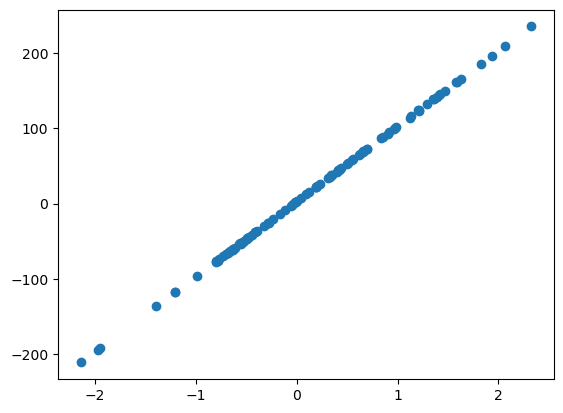

In [25]:
plt.scatter(xs[:,1], ys)

In [ ]:
preds

In [ ]:
grads